# 데이터 간 관계 시각화- 2


In [5]:
from matplotlib import pyplot as plt
from matplotlib import font_manager as fm # 글꼴을 시스템에 등록
import seaborn as sb
from hossam import load_data

In [6]:
origin = load_data('penguins')
origin.head()

[data] https://data.hossam.kr/data/lab06/penguins.xlsx
[desc] 남극 팔머 군도의 펭귄 3종에 대해 신체 치수와 서식지 정보(출처: seaborn 내장 데이터)

field              description
-----------------  -------------
species            팽귄 종
island             서식지
bill_length_mm     부리 길이
bill_depth_mm      부리 두께
flipper_length_mm  날개 길이
body_mass_g        몸무게
sex                성별



,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181,3750,MALE
1,Adelie,Torgersen,39.5,17.4,186,3800,FEMALE
2,Adelie,Torgersen,40.3,18.0,195,3250,FEMALE
3,Adelie,Torgersen,36.7,19.3,193,3450,FEMALE
4,Adelie,Torgersen,39.3,20.6,190,3650,MALE


## 명목형 변수에 대한 전처리

In [7]:
df1 = origin.astype({'species': 'category','island':'category','sex':'category'})
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   species            334 non-null    category
 1   island             334 non-null    category
 2   bill_length_mm     334 non-null    float64 
 3   bill_depth_mm      334 non-null    float64 
 4   flipper_length_mm  334 non-null    int64   
 5   body_mass_g        334 non-null    int64   
 6   sex                333 non-null    category
dtypes: category(3), float64(2), int64(2)
memory usage: 11.9 KB


In [8]:
my_dpi = 200
font_path = 'C:\\Users\\wodyd\\Documents\\카카오톡 받은 파일./MaruBuri-Regular.ttf'
fm.fontManager.addfont(font_path)
font_prop = fm.FontProperties(fname=font_path)
font_name = font_prop.get_name()
my_font_name = 'MaruBuri'
my_theme = 'dark'
sb.set_theme(style = my_theme)

plt.rcParams['font.family'] = my_font_name
plt.rcParams['font.size'] = 10
plt.rcParams['axes.unicode_minus'] = False

## RegPlot
- scatterplot에 단일 회귀선을 자동으로 추가
- 회귀선 주변의 신뢰구간도 함께 표시
- 두 변수 사이의 선형적 관계가 어느 정도인지 직관적으로 해석 가능
- 단일 그래프에서만 사용하며, 세부 커스터마이징 쉬움
- hue 지원 x

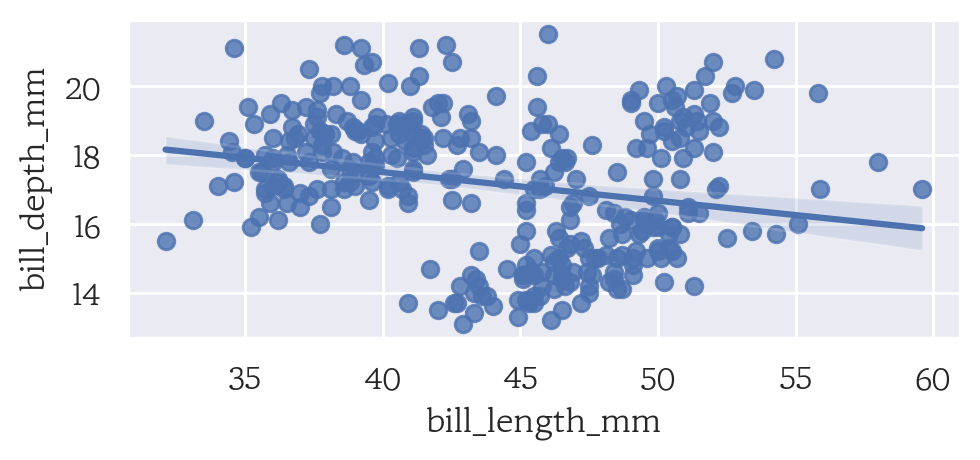

In [9]:
width_px = 1000
height_px = 480
rows = 1
cols = 1
figsize = (width_px/ my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

# box 그리기
sb.regplot(data=origin, x = 'bill_length_mm', y = 'bill_depth_mm')

# 그래프 꾸미기
ax.grid(True) # 배경 격자 표시/숨김

# 출력
plt.tight_layout()
plt.savefig('myplot.png', dpi = my_dpi)
plt.show()
plt.close()

### LmPlot
- regplot의 기능 확장한 형태(scatter + regplot)
- 여러 범주를 기준으로 행, 열로 나눠 비교 가능
- 색(hue),행(row),열(col)을 통해 그룹 간 관계 차이 시각화
- 관계 패턴을 다양한 하위집단으로 세분해 비교할 때 유용

In [15]:
my_dpi = 200
font_path = 'C:\\Users\\wodyd\\Documents\\카카오톡 받은 파일./MaruBuri-Regular.ttf'
fm.fontManager.addfont(font_path)
font_prop = fm.FontProperties(fname=font_path)
font_name = font_prop.get_name()
my_font_name = 'MaruBuri'
my_theme = 'dark'
sb.set_theme(style = my_theme)

plt.rcParams['font.family'] = my_font_name
plt.rcParams['font.size'] = 10
plt.rcParams['axes.unicode_minus'] = False

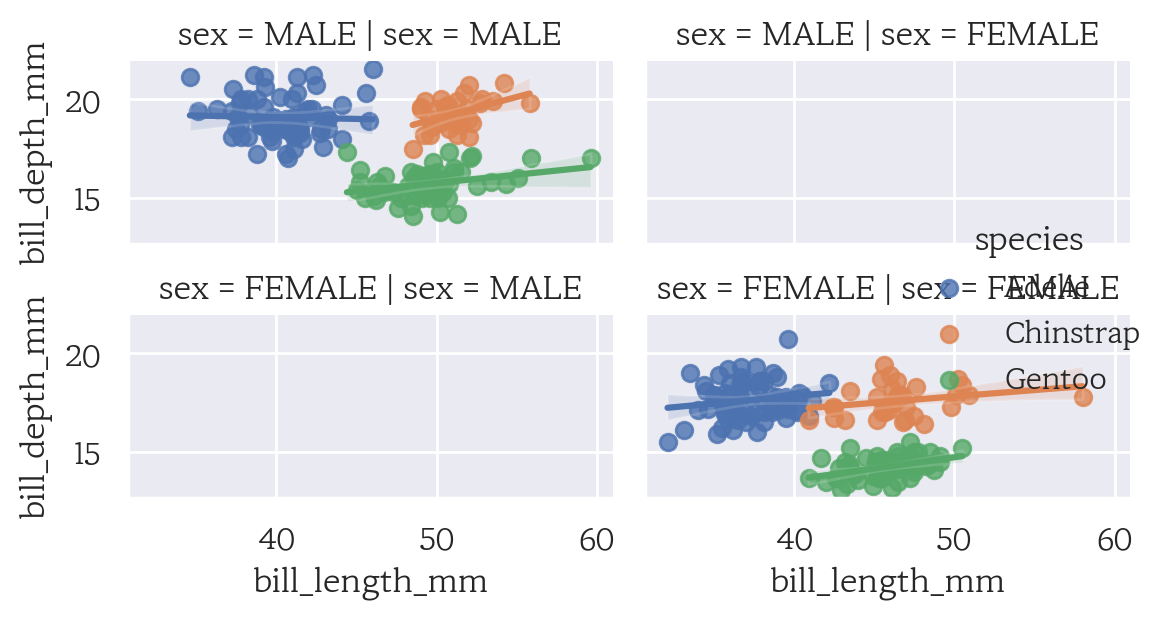

In [25]:
width_px = 1200
height_px = 640
rows = 1
cols = 1
figsize = (width_px/ my_dpi, height_px / my_dpi)

# box 그리기
g= sb.lmplot(data=origin, x ='bill_length_mm', y='bill_depth_mm', hue ='species', col ='sex', row ='sex') # col, row 선택사항
g.fig.set_figwidth(figsize[0])                                                                            # (하나의 캔버스에 두개의 그래프값 원할때 쓰임)
g.fig.set_dpi(my_dpi)
g.fig.set_figheight(figsize[1])
# 그래프 꾸미기
plt.grid() # 배경 격자 표시/숨김, 조건별 병렬 시각화에서는 사용 안함
for ax in g.axes.flatten():
    ax.grid(True)                 # for문 선택사항: 분할된 그래프에 패턴 적용시 사용


# 출력
plt.tight_layout()
plt.show()
plt.close()

### PairPlot (산점도 행)
- 모든 변수에 대한 교차 분석
- 전체 데이터의 구조와 변수 간 상관 관계를 한눈에 파악 가능
- 대각선 도표는 데이터의 주변 분포를 표시하기 위한 일변량 분포 도표(커널 밀도 곡선)이나 히스토그램이 그려짐
- EDA에서 초기 전반 스캔용으로 매우 유용
- 언제 쓰냐? -> 전체 변수들의 관계 파악을 한눈에 파악할 때

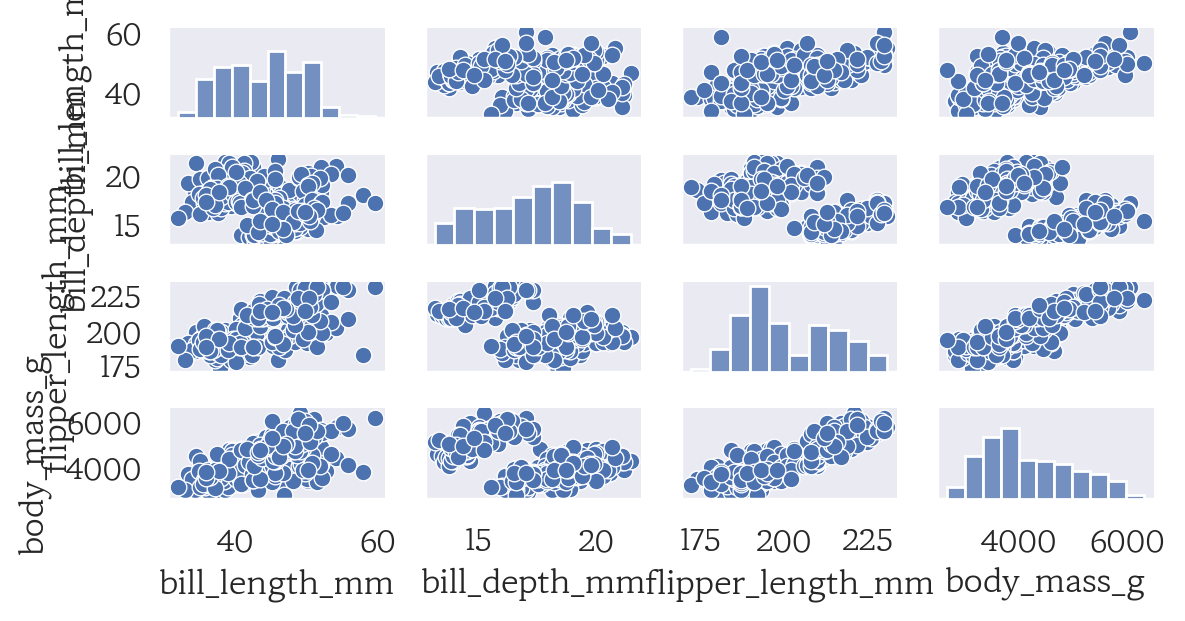

In [30]:
width_px = 1200
height_px = 640
figsize = (width_px/ my_dpi, height_px / my_dpi)

# pairplot 그리기
# 'corner=True' 파라미터 추가 시 아래쪽 삼각형만 플롯된다
g= sb.pairplot(origin) 
g.fig.set_figwidth(figsize[0])                                                                          
g.fig.set_dpi(my_dpi)
g.fig.set_figheight(figsize[1])

# 출력
plt.grid()
plt.tight_layout()
plt.show()
plt.close()

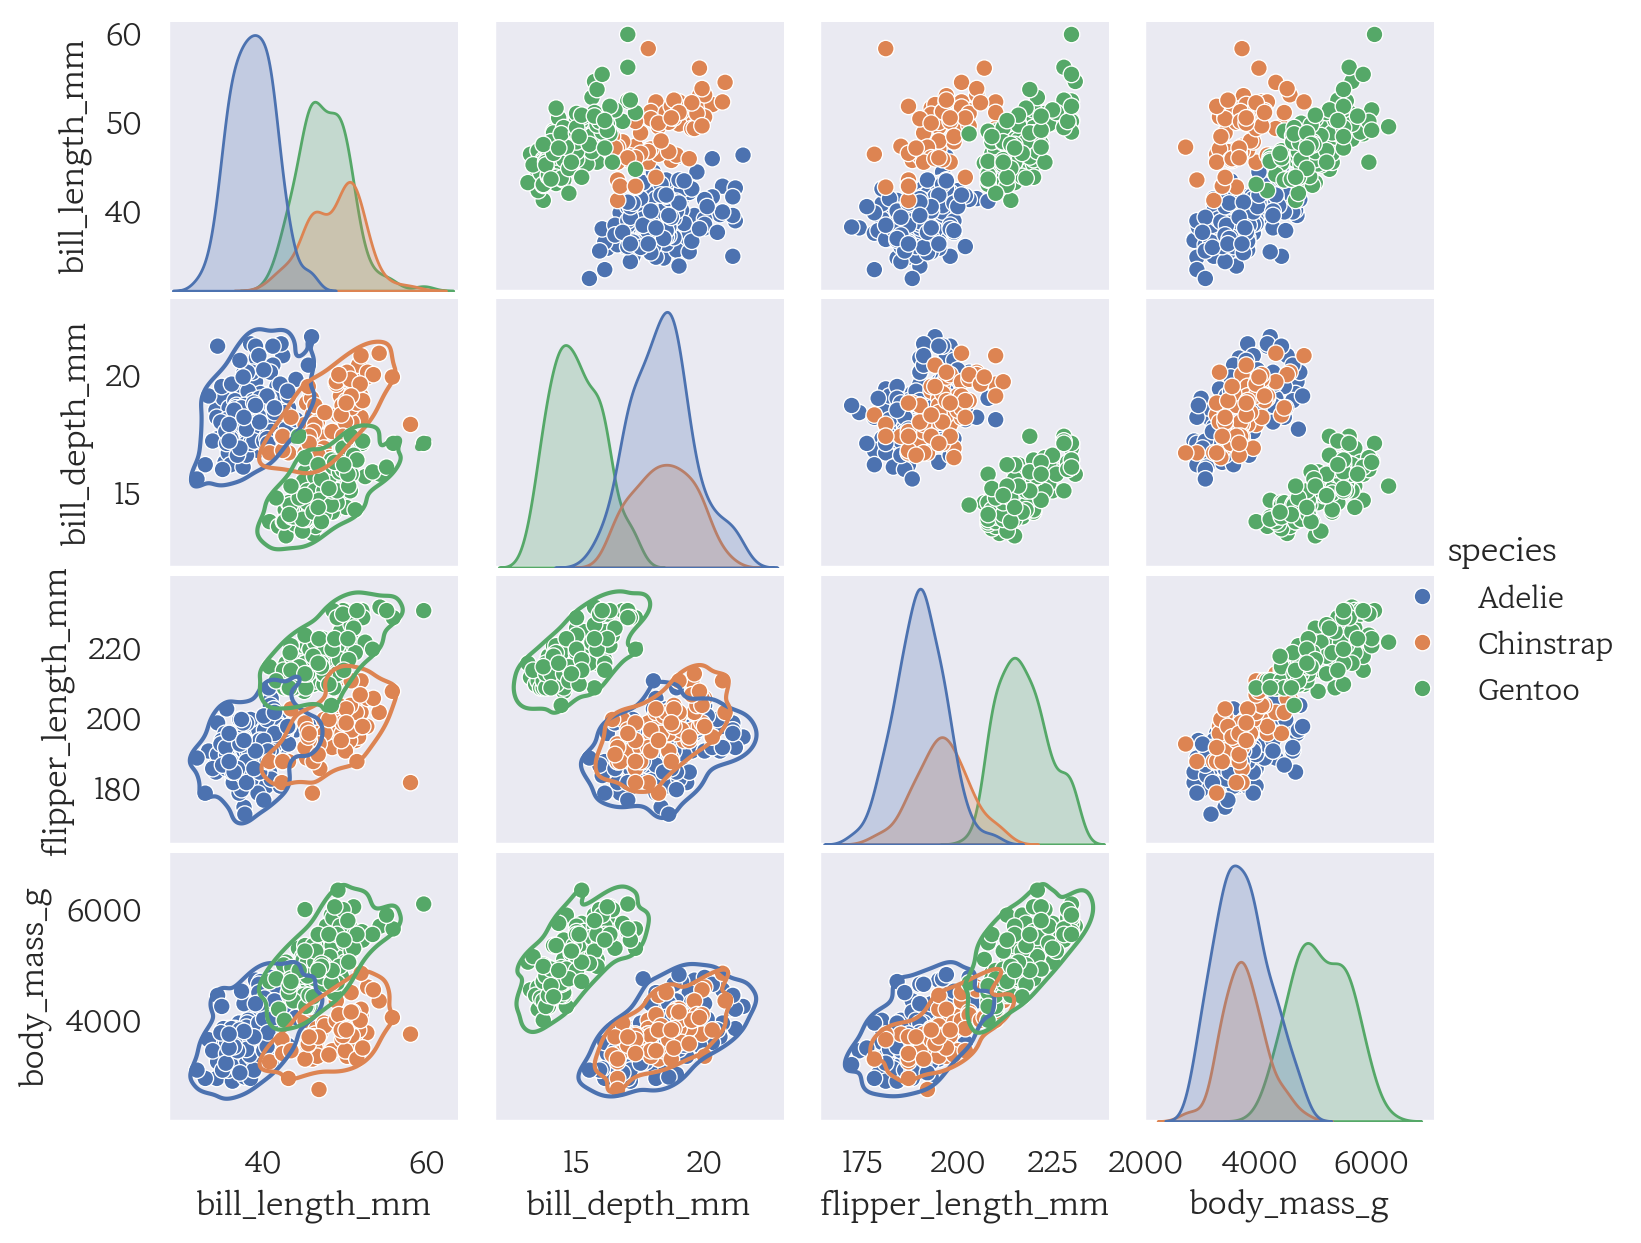

In [ ]:
width_px = 1600
height_px = 1200
figsize = (width_px/ my_dpi, height_px / my_dpi)

# pairplot 그리기
# 'corner=True' 파라미터 추가 시 아래쪽 삼각형만 플롯된다
# 'diag_kind' 파라미터에 'hist'값 적용, 'kde': 기본값, 범주별 구분 시 사용
# x_vars, y_vars 파라미터에 원하는 변수를 선택적으로 적용한다, 선택적 변수 적용 시 사용
g= sb.pairplot(origin, hue = 'species',) #diag_kind ='hist',
               #x_vars = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm'],
               #y_vars = ['bill_length_mm', 'bill_depth_mm'])
# 그룹별로 묶어서 표시할 때 사용
g.map_lower(sb.kdeplot, levels = 1, color = 0.2)
g.fig.set_figwidth(figsize[0])                                                                          
g.fig.set_dpi(my_dpi)
g.fig.set_figheight(figsize[1])

# 출력
plt.grid()
plt.show()
plt.close()